In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x=np.linspace(-5.0,5.0,69)
y=np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])


In [ ]:
x1 = np.linspace(-5.0,5.0,69)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

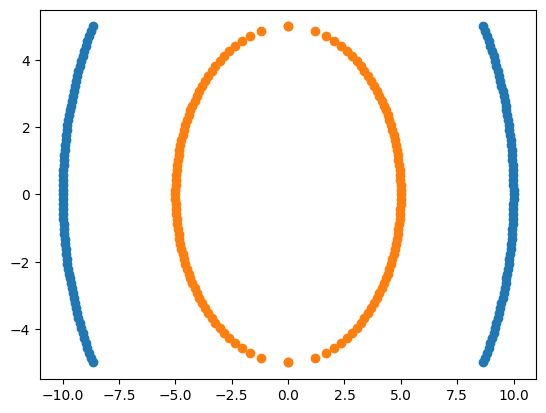

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [ ]:
## CREATING DATA FRAMES
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0   ## MARKING Y LABEL OF df1 as 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1   ##MARKING Y LABEL OF df2 as 1
df = df1.append(df2)
df.head(5)

<ipython-input-16-787b3cc8b76a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,X1,X2,Y
0,8.660254,-5.000000,0
1,8.743510,-4.852941,0
2,8.823529,-4.705882,0
3,8.900400,-4.558824,0
4,8.974204,-4.411765,0


In [ ]:
### Dividing into independtent and dependent features
X = df.iloc[:, :2] ##independent variables
y = df.Y    ##dependent variables


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
133    1
134    1
135    1
136    1
137    1
Name: Y, Length: 276, dtype: int64

In [ ]:
## Spliting dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [ ]:
y_train

114    1
129    0
97     0
54     0
111    0
      ..
113    1
54     1
117    0
47     0
34     1
Name: Y, Length: 207, dtype: int64

In [ ]:
y_test

46     1
15     0
55     0
74     0
50     1
      ..
38     1
66     1
133    1
76     0
44     0
Name: Y, Length: 69, dtype: int64

In [49]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [50]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#Finding components for the polynomical kernel
# X1,X2,X1_square ,X2_Square ,X1*X2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.000000,0,75.000000,25.000000,-43.301270
1,8.743510,-4.852941,0,76.448962,23.551038,-42.431738
2,8.823529,-4.705882,0,77.854671,22.145329,-41.522491
3,8.900400,-4.558824,0,79.217128,20.782872,-40.575355
4,8.974204,-4.411765,0,80.536332,19.463668,-39.592075


In [ ]:
##Split independent and dependent feaures
X=df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y=df['Y']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
133    1
134    1
135    1
136    1
137    1
Name: Y, Length: 276, dtype: int64

In [ ]:
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size =0.25,random_state=0)


In [ ]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
114,-4.731091,-1.617647,22.383218,2.616782,7.653235
129,-9.240164,-3.823529,85.380623,14.619377,35.330037
97,-9.960997,0.882353,99.221453,0.778547,-8.789115
54,9.557692,2.941176,91.349481,8.650519,28.110860
111,-9.930555,-1.176471,98.615917,1.384083,11.683006
...,...,...,...,...,...
113,-4.778846,-1.470588,22.837370,2.162630,7.027715
54,4.043449,2.941176,16.349481,8.650519,11.892497
117,-9.785768,-2.058824,95.761246,4.238754,20.147168
47,9.815557,1.911765,96.345156,3.654844,18.765035


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df,x='X1_Square', y='X1_Square',z='X1*X2',color = 'Y')
fig.show()

In [ ]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
114,-4.731091,-1.617647,22.383218,2.616782,7.653235
129,-9.240164,-3.823529,85.380623,14.619377,35.330037
97,-9.960997,0.882353,99.221453,0.778547,-8.789115
54,9.557692,2.941176,91.349481,8.650519,28.110860
111,-9.930555,-1.176471,98.615917,1.384083,11.683006
...,...,...,...,...,...
113,-4.778846,-1.470588,22.837370,2.162630,7.027715
54,4.043449,2.941176,16.349481,8.650519,11.892497
117,-9.785768,-2.058824,95.761246,4.238754,20.147168
47,9.815557,1.911765,96.345156,3.654844,18.765035


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()

In [ ]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred )

1.0